In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import randint
from pprint import pprint
df = pd.read_csv('combined.csv',header=1)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   objid           200000 non-null  int64  
 1   u               200000 non-null  float64
 2   g               200000 non-null  float64
 3   r               200000 non-null  float64
 4   i               200000 non-null  float64
 5   z               200000 non-null  float64
 6   modelMag_u      200000 non-null  float64
 7   modelMag_g      200000 non-null  float64
 8   modelMag_r      200000 non-null  float64
 9   modelMag_i      200000 non-null  float64
 10  modelMag_z      200000 non-null  float64
 11  nMgyPerCount_u  200000 non-null  float64
 12  nMgyPerCount_g  200000 non-null  float64
 13  nMgyPerCount_r  200000 non-null  float64
 14  nMgyPerCount_i  200000 non-null  float64
 15  nMgyPerCount_z  200000 non-null  float64
 16  petroMag_u      200000 non-null  float64
 17  petroMag_g

In [3]:
df.head()

,objid,u,g,r,i,z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,...,err_g,err_r,err_i,err_z,expAB_r,deVAB_r,expRad_r,deVRad_r,class,redshift
0,1237648705677558405,19.42596,18.40534,17.54040,17.10209,16.80152,19.42596,18.40534,17.54040,17.10209,...,0.011774,0.008512,0.008704,0.022125,0.725152,0.718584,2.038153,4.106713,GALAXY,0.193908
1,1237648705677623407,17.26143,16.11382,15.91448,15.86646,15.86977,17.26143,16.11382,15.91448,15.86646,...,0.003618,0.003725,0.003777,0.006023,0.150031,0.249987,0.050927,0.025140,STAR,0.000208
2,1237648705677688913,18.31802,16.97997,16.44185,16.23855,16.13750,18.31802,16.97997,16.44185,16.23855,...,0.004336,0.004031,0.004100,0.006820,0.752798,0.992956,0.000426,0.003976,STAR,0.000218
3,1237648705677689059,19.24354,17.55958,16.70882,16.27199,15.96455,19.24354,17.55958,16.70882,16.27199,...,0.005917,0.004524,0.004553,0.009827,0.721513,0.738088,1.819643,2.776990,GALAXY,0.056448
4,1237648705677689065,18.16017,16.86312,16.24890,15.89084,15.64687,18.16017,16.86312,16.24890,15.89084,...,0.006092,0.004596,0.004520,0.011545,0.608859,0.588652,4.768722,12.319670,GALAXY,0.056281


In [4]:
df['class_numeric'] = df['class'].replace({'QSO': 0, 'STAR': 1, 'GALAXY': 2})

C:\Users\Shakthi\AppData\Local\Temp\ipykernel_16916\3448048250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class_numeric'] = df['class'].replace({'QSO': 0, 'STAR': 1, 'GALAXY': 2})


In [5]:
df=df.head(1000)
features = ['u', 'g', 'r', 'i', 'z','class_numeric']
target = 'redshift'
X = df[features]
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [7]:
X_accumulated = pd.DataFrame()
y_accumulated = pd.Series(dtype=float)
r2_list=[]
mse_list=[]
c=0
for i in range(0,len(df),10):
    batch = df.iloc[i:i+10]
    X_batch = batch[features]
    y_batch = batch[target]
    X_accumulated = pd.concat([X_accumulated, X_batch])
    y_accumulated = pd.concat([y_accumulated, y_batch])
    rf.fit(X_accumulated, y_accumulated)
    y_pred = rf.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2_list.append(r2)
    mse_list.append(mse)
    c=c+1

In [8]:
no_data_points=np.linspace(10, 1000, 100)
r2_list = np.array(r2_list)
mse_list = np.array(mse_list)

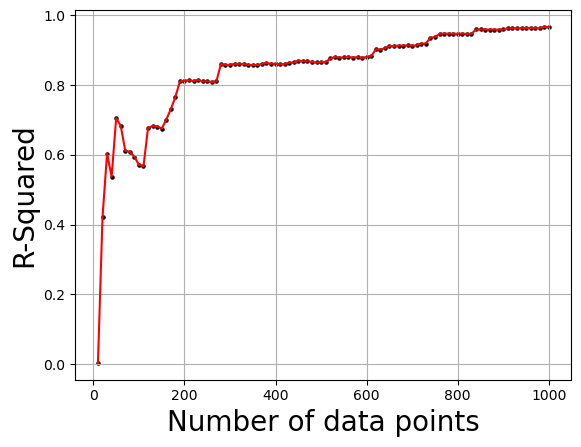

In [31]:
# plt.title("R-Squared score",fontsize="20") 
plt.xlabel("Number of data points",fontsize="20") 
plt.ylabel("R-Squared",fontsize="20") 
plt.grid()
plt.plot(no_data_points,r2_list, color ="red")
plt.scatter(no_data_points,r2_list,s=5,color="k")
plt.show()
# fig.save("D:\R")

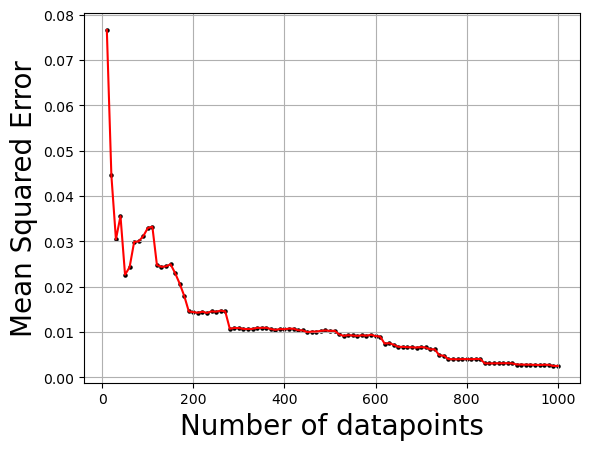

In [86]:
plt.xlabel("Number of datapoints",fontsize="20") 
plt.ylabel("Mean Squared Error",fontsize="20") 
plt.plot( no_data_points, mse_list, color ="red") 
plt.scatter(no_data_points,mse_list,s=5,color="k")
plt.grid()
plt.savefig('Mean Squared Error Plot')
plt.show()

In [63]:
rf.fit(X[0:399],y[0:399])

RandomForestRegressor(max_depth=10, random_state=42)

In [81]:
df = pd.read_csv('combined.csv',header=1)
df2 = df[1000:10000]
df2['class_numeric'] = df2['class'].replace({'QSO': 0, 'STAR': 1, 'GALAXY': 2})

C:\Users\Shakthi\AppData\Local\Temp\ipykernel_16916\358968913.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['class_numeric'] = df2['class'].replace({'QSO': 0, 'STAR': 1, 'GALAXY': 2})
C:\Users\Shakthi\AppData\Local\Temp\ipykernel_16916\358968913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['class_numeric'] = df2['class'].replace({'QSO': 0, 'STAR': 1, 'GALAXY': 2})


In [83]:
X2=df2[features]
y2=df2[target]
y2_pred = rf.predict(X2)
r2_2 = r2_score(y2, y2_pred)
mse_2 = mean_squared_error(y2, y2_pred)
print(f"R-Squared:{r2_2},Mean Squared Error:{mse_2}")

R-Squared:0.6933674571216382,Mean Squared Error:0.046167698175478396
